<a href="https://colab.research.google.com/github/AyaTareekAhmmeed/Data-Analysis-Projects-/blob/main/Pima%20Indian%20dataset%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
from sklearn.model_selection import cross_val_score

In [2]:
# load the dataset
df = pd.read_csv('/content/diabetes (1).csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#name of columns
print(df.columns)

#type of columns
print(df.dtypes)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [4]:
# Descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


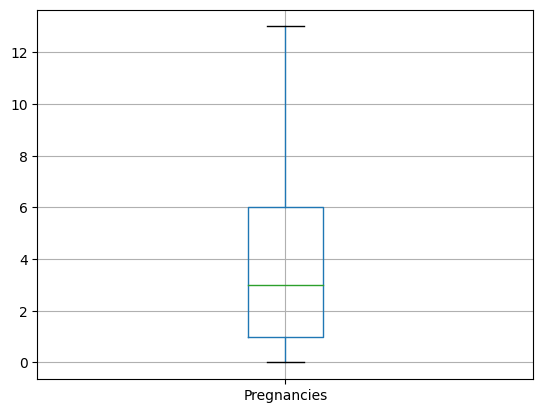

In [5]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['Pregnancies'].quantile(.25)
Q3 = df['Pregnancies'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['Pregnancies'].between(q1, q3)]

boxplot = df.boxplot(column=['Pregnancies'])

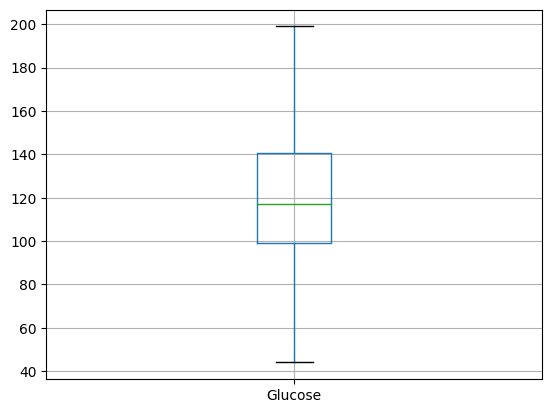

In [6]:
Q1 = df['Glucose'].quantile(.25)
Q3 = df['Glucose'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['Glucose'].between(q1, q3)]

boxplot = df.boxplot(column=['Glucose'])

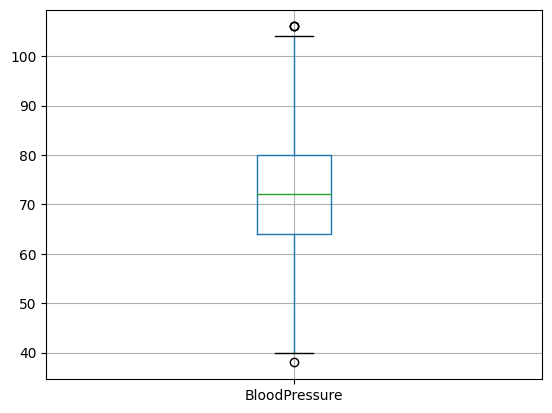

In [7]:
Q1 = df['BloodPressure'].quantile(.25)
Q3 = df['BloodPressure'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['BloodPressure'].between(q1, q3)]

boxplot = df.boxplot(column=['BloodPressure'])

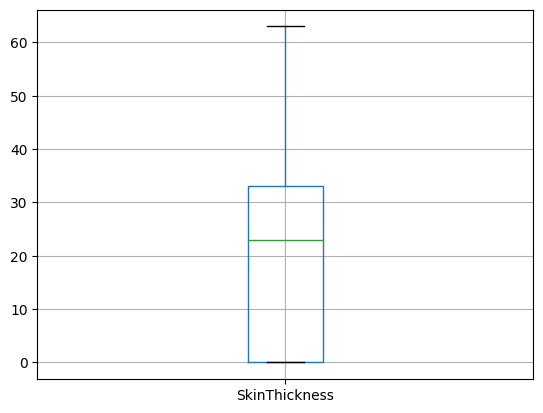

In [8]:
Q1 = df['SkinThickness'].quantile(.25)
Q3 = df['SkinThickness'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['SkinThickness'].between(q1, q3)]

boxplot = df.boxplot(column=['SkinThickness'])

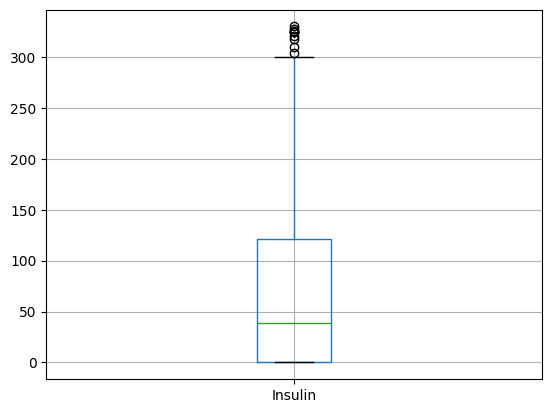

In [9]:
Q1 = df['Insulin'].quantile(.25)
Q3 = df['Insulin'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['Insulin'].between(q1, q3)]

boxplot = df.boxplot(column=['Insulin'])


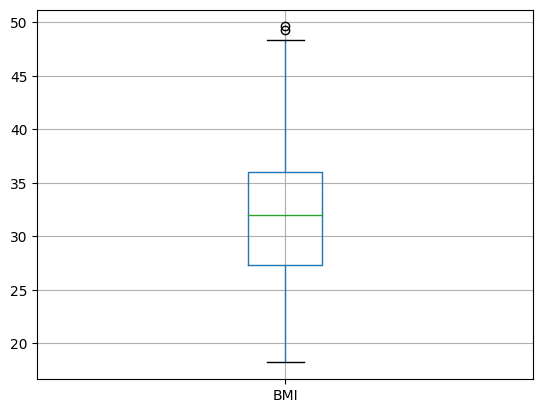

In [10]:
Q1 = df['BMI'].quantile(.25)
Q3 = df['BMI'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['BMI'].between(q1, q3)]

boxplot = df.boxplot(column=['BMI'])

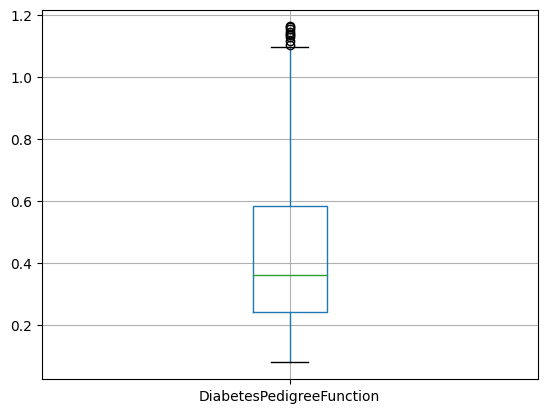

In [11]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['DiabetesPedigreeFunction'].quantile(.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['DiabetesPedigreeFunction'].between(q1, q3)]

boxplot = df.boxplot(column=['DiabetesPedigreeFunction'])

In [12]:
#showing data details after removing outliers
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,3.811437,119.208655,72.143740,20.471406,67.936631,31.928594,0.426577,33.165379,0.310665
std,3.246574,29.304287,11.306429,15.304202,83.324373,6.368231,0.244432,11.756778,0.463124
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.250000,0.240000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,38.000000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.900000,0.583000,40.500000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,81.000000,1.000000


In [13]:
#replacing 0 with null values to remove them
dataset = df.copy(deep = True)
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               182
Insulin                     310
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [14]:
#filling missing values using IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imptr = IterativeImputer(RandomForestRegressor(n_estimators=10), max_iter=50, random_state=44)
dataset = pd.DataFrame(imptr.fit_transform(dataset), columns = dataset.columns)


# showing the count of Nans
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [15]:
#set input and output data
labels = dataset.columns.drop(['Outcome'])
X = dataset[labels]
y = dataset.Outcome
print(X.shape)

(647, 8)


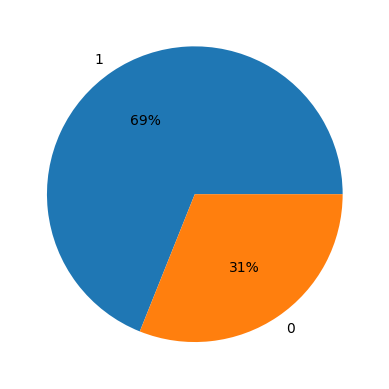

In [16]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=plt.pie(values,labels=labels,autopct='%.0f%%')

    plt.show([trace])

PlotPie(df, 'Outcome')

We note that 0 and 1 not equal this may cause overfitting in our model we are going to solve this using SMOT method

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.000000,72.000000,35.000000,151.600000,33.600000,0.627000,50.000000,1.0
1,1.000000,85.000000,66.000000,29.000000,54.900000,26.600000,0.351000,31.000000,0.0
2,8.000000,183.000000,64.000000,20.000000,165.600000,23.300000,0.672000,32.000000,1.0
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000,0.0
4,5.000000,116.000000,74.000000,25.300000,104.000000,25.600000,0.201000,30.000000,0.0
...,...,...,...,...,...,...,...,...,...
887,4.029772,149.504962,73.049620,29.000000,126.495038,32.279276,0.522202,48.059544,1.0
888,1.282015,118.234530,85.516545,39.040288,219.798560,45.350215,0.802078,29.564031,1.0
889,10.067666,141.601499,94.000000,32.160899,141.105245,34.781948,0.477760,48.202997,1.0
890,8.305316,107.137210,94.504317,34.778737,174.791595,40.521627,0.245412,42.252158,1.0


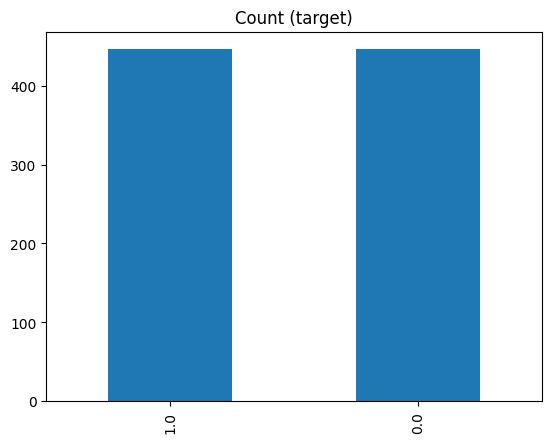

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(n_jobs=-1)#ratio='minority',n_jobs=-1
X, y = smote.fit_resample(dataset[labels], dataset['Outcome'])

dataset = pd.DataFrame(X, columns=labels)
dataset['Outcome'] = y

dataset['Outcome'].value_counts().plot(kind='bar', title='Count (target)');

dataset

Data Transformation

In [18]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
X= pca.fit_transform(X)
print(X)

[[ 2.02514364e+01 -1.84682776e+01  8.30592155e+00 ... -4.87948194e-01
   1.00685841e+00  1.76225987e-01]
 [-9.37759566e+01  7.32109735e+00 -7.95901668e-02 ... -3.30738284e+00
   3.32523103e+00 -3.95002450e-02]
 [ 4.32980859e+01 -4.50213778e+01 -1.81823861e+01 ... -3.99603718e+00
  -4.17948287e+00  2.78898000e-01]
 ...
 [ 9.13632293e+00 -1.76211320e+01  2.28570646e+01 ... -3.42060534e-01
  -3.58586337e+00  3.56800435e-02]
 [ 2.85004704e+01  2.70374718e+01  2.24351773e+01 ...  2.03342274e+00
  -3.09006924e+00 -2.44712451e-01]
 [ 5.32182823e+01 -3.54963275e+01 -1.43254101e+01 ...  3.68109233e+00
  -1.09338584e+00 -8.87891274e-02]]


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =sc.fit_transform(X)#only rearangeng x

print(X)
print(X.shape)

[[ 0.30816332 -0.88284276  0.65632692 ... -0.13118461  0.37547788
   0.76486437]
 [-1.42697581  0.34997188 -0.00628915 ... -0.88918812  1.24004594
  -0.17144083]
 [ 0.65886101 -2.15216589 -1.43675682 ... -1.07433248 -1.55861373
   1.21048631]
 ...
 [ 0.13902617 -0.84234648  1.80614598 ... -0.09196279 -1.33724101
   0.15486021]
 [ 0.43368773  1.29247765  1.77280879 ...  0.54668463 -1.15234935
  -1.06211257]
 [ 0.80981527 -1.69683802 -1.13198183 ...  0.98965972 -0.4077457
  -0.38536678]]
(892, 8)


In [20]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X =mms.fit_transform(X)#only rearangeng x

print(X)
print(X.shape)

[[0.47632414 0.35441312 0.55219252 ... 0.47639462 0.55366365 0.51984988]
 [0.13393802 0.51630043 0.43463034 ... 0.35041328 0.69056703 0.32939409]
 [0.54552552 0.18773168 0.18083497 ... 0.319642   0.24740242 0.61049477]
 ...
 [0.44294917 0.35973089 0.75619487 ... 0.48291335 0.28245654 0.39576766]
 [0.50109323 0.64006577 0.75028014 ... 0.58905752 0.31173393 0.1482207 ]
 [0.57531255 0.24752316 0.23490853 ... 0.66268066 0.42964108 0.28587897]]
(892, 8)


In [21]:
#perform training and test split we aplly stratify to make sure 1 is equal to 0 in randon split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=44,stratify=y , shuffle =True)

In [22]:
#Model Validation
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=12, random_state=44)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

In [23]:
#ExtraTreesClassifier
#Parameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier(random_state=44)

param_grid = {
    'n_estimators': [200, 500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,10,12,14 ,18,16],
    'criterion' :['gini', 'entropy']
}


CV_ET = GridSearchCV(estimator=ET, param_grid=param_grid, cv= 5)
CV_ET.fit(X, y)

CV_ET.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'log2',
 'n_estimators': 200}

In [24]:
ETModel = ExtraTreesClassifier(random_state=44, max_features='log2', n_estimators= 200, max_depth=18, criterion='gini')

ETscore = evaluate_model(ETModel, X ,y)

#fitting model
ETModel.fit(X_train, y_train)
#Calculating Details
print('ETModel Train Score is : ' , ETModel.score(X_train, y_train))
print('ETModel Test Score is : ' , ETModel.score(X_test, y_test))

ETModel Train Score is :  1.0
ETModel Test Score is :  0.8666666666666667


In [25]:
ET_pred=ETModel.predict(X_test)
print("Accuracy for ExtraTreesClassifie on CV data: ",accuracy_score(y_test,ET_pred))

Accuracy for ExtraTreesClassifie on CV data:  0.8666666666666667


Confusion Matrix is : 
 [[39  6]
 [ 6 39]]


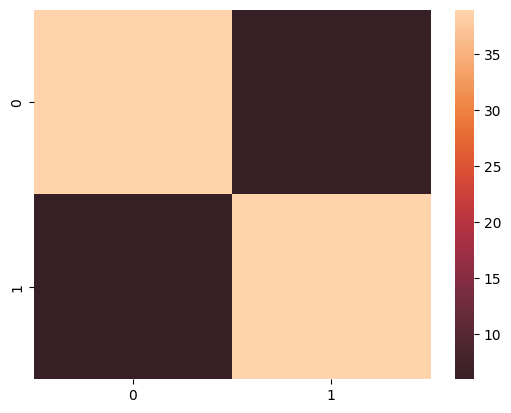

In [27]:
#Calculating Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, ET_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()